### Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:  
**1.satisfaction_level**​ - Уровень удовлетворенности работой  
**2.Last_evaluation**​- Время с момента последней оценки в годах  
**3.number_projects​** - Количество проектов, выполненных за время работы  
**4.average_monthly_hours​** - Среднее количество часов на рабочем месте в месяц  
**5.time_spend_company​** - Стаж работы в компании в годах  
**6.work_accident​** - Происходили ли несчастные случаи на рабочем месте с сотрудником  
**7.left​**- уволился ли сотрудник  
**8.promotion_last_5years​** - повышался ли сотрудник за последние пять лет  
**9.department** ​- отдел в котором работает сотрудник  
**10.salary​** - относительный уровень зарплаты

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [3]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#Подсчет Моды для показателей
print('Значение моды для satisfaction_level: ', hr.satisfaction_level.mode()[0])
print('Значение моды для last_evaluation: ', hr.last_evaluation.mode()[0])
print('Значение моды для number_project: ', hr.number_project.mode()[0])
print('Значение моды для average_montly_hours: ', hr.average_montly_hours.mode()[0])
print('Значение моды для time_spend_company: ', hr.time_spend_company.mode()[0])

Значение моды для satisfaction_level:  0.1
Значение моды для last_evaluation:  0.55
Значение моды для number_project:  4
Значение моды для average_montly_hours:  135
Значение моды для time_spend_company:  3


### Задание 3
Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
hr_num = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
hr_num.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


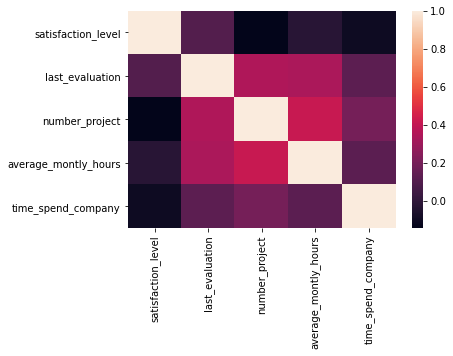

In [8]:
sns.heatmap(hr_num.corr())

Две самые скоррелированные переменные - average_montly_hours / number_project, last_evaluation / number_project  
Две самые нескоррелиированные переменные - satisfaction_level / average_montly_hours, satisfaction_level / time_spend_company 

### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [9]:
hr_dep_workers = hr.groupby(['department']).size().sort_values( ascending=False).reset_index(name='amount_of_workers')
hr_dep_workers

,department,amount_of_workers
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### Задание 5
Показать распределение сотрудников по зарплатам.

In [10]:
hr_salary = hr.groupby(['salary']).size().sort_values( ascending=False).reset_index(name='salary_distribution')
hr_salary

,salary,salary_distribution
0,low,7316
1,medium,6446
2,high,1237


(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

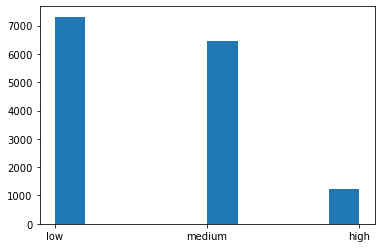

In [11]:
plt.hist(hr['salary'])

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
hr_salary_by_dep = hr.groupby(['department', 'salary']).size().reset_index(name='distribution')
hr_salary_by_dep

,department,salary,distribution
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


### Задание 7
**Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

Предположим, что сотрудники с низким окладом проводят на работе столько же времени, сколько сотрудники с высоким окладом (нулевая гипотеза)

In [13]:
high_salary_hours_mean = hr[hr['salary'] == 'high'].average_montly_hours.mean()
high_salary_hours_std = hr[hr['salary'] == 'high'].average_montly_hours.std()
low_salary_hours_mean = hr[hr['salary'] == 'low'].average_montly_hours.mean()
low_salary_hours_std = hr[hr['salary'] == 'low'].average_montly_hours.std()

print(f'Ср. кол-во часов на работе у сотрудников с выcоким окладом: {high_salary_hours_mean} при стандартном отклонении {high_salary_hours_std}')

print(f'Ср. кол-во часов на работе у сотрудников с низким окладом.: {low_salary_hours_mean} при стандартном отклонении {low_salary_hours_std}')

Ср. кол-во часов на работе у сотрудников с выcоким окладом: 199.86742118027485 при стандартном отклонении 47.710445562322235
Ср. кол-во часов на работе у сотрудников с низким окладом.: 200.9965828321487 при стандартном отклонении 50.832214201477065


In [14]:
hr_salary = hr[['salary', 'average_montly_hours']]
hr_low_salary = hr_salary[hr_salary['salary'] == 'low']
hr_high_salary = hr_salary[hr_salary['salary'] == 'high']
stats.ttest_ind(a=hr_high_salary['average_montly_hours'],b=hr_low_salary['average_montly_hours'],equal_var=False)

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)

**Значение p-value равное 0,446 говорит нам о том, что аргументов, чтобы отвергнуть нашу нулевую гипотезу не достаточно.**

### Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):  
●Доля сотрудников с повышением за последние 5 лет  
●Средняя степень удовлетворенности  
●Среднее количество проектов

In [15]:
hr_left_with_promotion = hr.loc[(hr['left'] == 1) & (hr['promotion_last_5years'] == 1)]

hr_workig_with_promotion = hr.loc[(hr['left'] == 0) & (hr['promotion_last_5years'] == 1)]

print(f'Доля уволившихся сотрудников получивших повышение за последние 5 лет {round(len(hr_left_with_promotion)/14999*100, 2)}%')

print(f'Доля работающих сотрудников получивших повышение за последние 5 лет {round(len(hr_workig_with_promotion)/14999*100, 2)}%')


Доля уволившихся сотрудников получивших повышение за последние 5 лет 0.13%
Доля работающих сотрудников получивших повышение за последние 5 лет 2.0%


In [16]:
hr_left_satisfaction = hr.loc[(hr['left'] == 1)].satisfaction_level.mean()

hr_workig_satisfaction = hr.loc[(hr['left'] == 0)].satisfaction_level.mean()

print(f'Средняя степеь удовлетворенности уволившихся сотрудников {round(hr_left_satisfaction, 2)}')
print(f'Средняя степеь удовлетворенности неуволившихся сотрудников{round(hr_workig_satisfaction, 2)}')

Средняя степеь удовлетворенности уволившихся сотрудников 0.44
Средняя степеь удовлетворенности неуволившихся сотрудников0.67


In [18]:
hr_left_number_project = hr.loc[(hr['left'] == 1)].number_project.mean()

hr_workig_number_project = hr.loc[(hr['left'] == 0)].number_project.mean()

print(f'Среднее количество проектов уволившихся сотрудников {round(hr_left_number_project, 2)}')
print(f'Среднее количество проектов неуволившихся сотрудников {round(hr_workig_number_project, 2)}')

Среднее количество проектов уволившихся сотрудников 3.86
Среднее количество проектов неуволившихся сотрудников 3.79


### Задание 9
Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
Оценить качество модели на тестовой выборки

In [19]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [72]:
data = hr[[ 'time_spend_company', 'number_project']]
data_class = hr.left

In [73]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3)

In [74]:
lda = LinearDiscriminantAnalysis()

In [75]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [76]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
14334,1.0,NaN
13108,0.0,NaN
13690,0.0,NaN
11731,0.0,NaN
1764,1.0,0.0
...,...,...
13830,0.0,NaN
3924,0.0,0.0
10836,0.0,NaN
1311,1.0,0.0


In [78]:
# расчет точности - отношение верных прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7393333333333333

In [79]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 14334 to 4063
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   left       4500 non-null   float64
 1   Unnamed 0  1376 non-null   float64
dtypes: float64(2)
memory usage: 265.5 KB


На основании результатов полученной модели можно сделать вывод, что предоставленных данных недостаточно для прогнозирования увольнения, несмотря на неплохую точность 74%.

### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку